# **KÜTÜPHANELER**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


# **VERİ SETİ SEÇİMİ VE ÖN İŞLEMESİ**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
## X_train boyut,
X_train.shape

(60000, 28, 28)

In [ ]:
## y_train boyut,
y_train.shape

(60000,)

In [ ]:
## X_test boyut,
X_test.shape

(10000, 28, 28)

In [ ]:
## y_test boyut,
y_test.shape

(10000,)

In [ ]:
# Görüntülerin boyutu,
X_train[0].shape

(28, 28)

In [ ]:
## 60000 tane eğitim, 10000 tane test görüntüsü vardır.
## Veriler 28*28 boyutundadır.

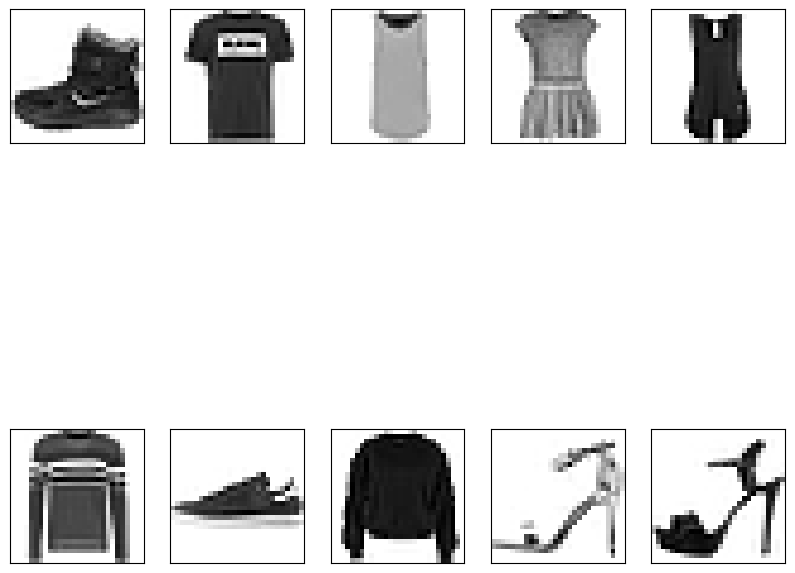

In [ ]:
# 10 görüntüyü görselleştirme
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2, 5, i + 1) #2 satır, 5 sütun
    plt.xticks([]) #x ekseni etiketlerini kaldır
    plt.yticks([]) #y ekseni etiketlerini kaldır
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show() #görselleştir


In [ ]:
# Verileri normalize etme.
X_train = X_train / 255.0
X_test = X_test / 255.0
#Normalleştirmemizin nedeni, piksel değerlerini 0-255 aralığından 0-1 aralığına düşürmektir. Bu modelin daha iyi performans göstermesini sağlar.

**MODEL EĞİTME**

In [ ]:
#Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 28*28 boyutundaki görüntü 784 özellikli vektöre dönüştürülür.
X_train = X_train.reshape(X_train.shape[0], 28 * 28) # otomatik doldurması için -1 de kullanılabilirdi.
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

KNN MODELİ

In [ ]:
# KNN modelini oluşturup eğitim verileri ile eğitiyoruz.
knn=KNeighborsClassifier().fit(X_train,y_train)

# Test verileri ile tahmin yapıyoruz.
y_pred=knn.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.8554
F1 Skoru: 0.8546
Geri Çağırma (Recall): 0.8554
Kesinlik (Precision): 0.8578


In [ ]:
# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)


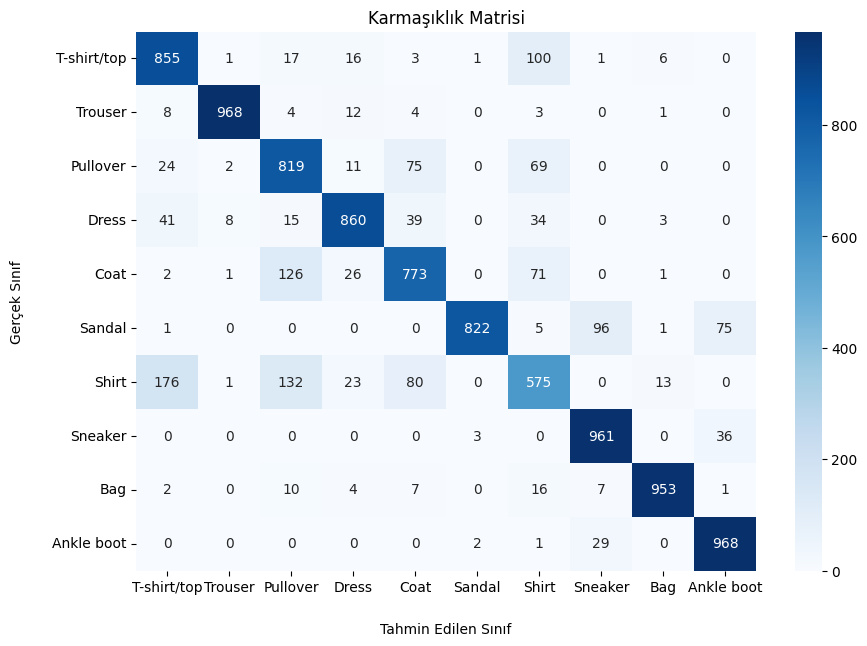

In [ ]:
# Sınıf etiketleri
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf',labelpad=20)
plt.ylabel('Gerçek Sınıf',labelpad=20)
plt.title('Karmaşıklık Matrisi')
plt.show()

**RANDOM FOREST MODELİ**

In [ ]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')


In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.8771
F1 Skoru: 0.8756
Geri Çağırma (Recall): 0.8771
Kesinlik (Precision): 0.8760


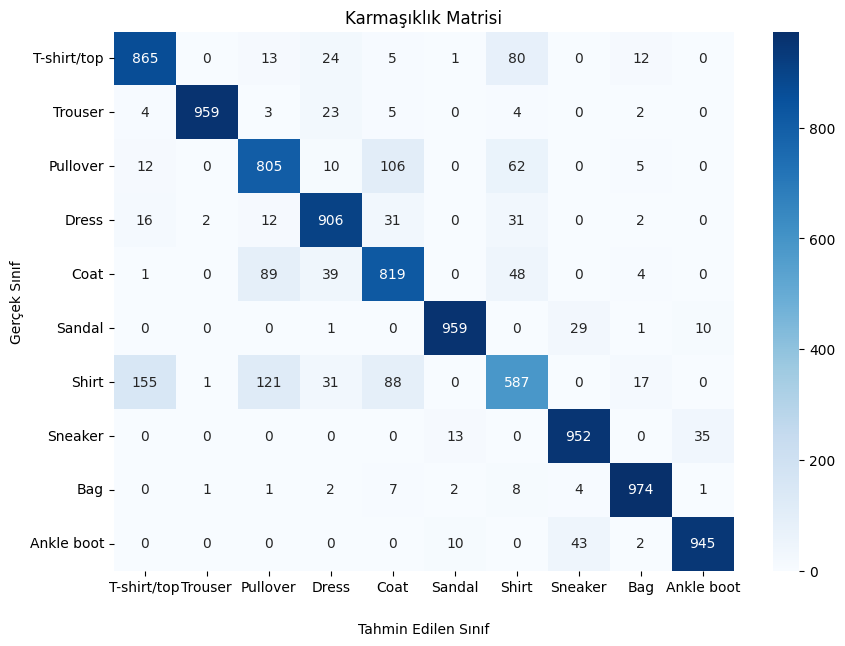

In [ ]:
# Karmaşıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketleri
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf', labelpad=20)
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

DECİSİON TREE

In [ ]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
y_pred=dt.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.7905
F1 Skoru: 0.7911
Geri Çağırma (Recall): 0.7905
Kesinlik (Precision): 0.7919


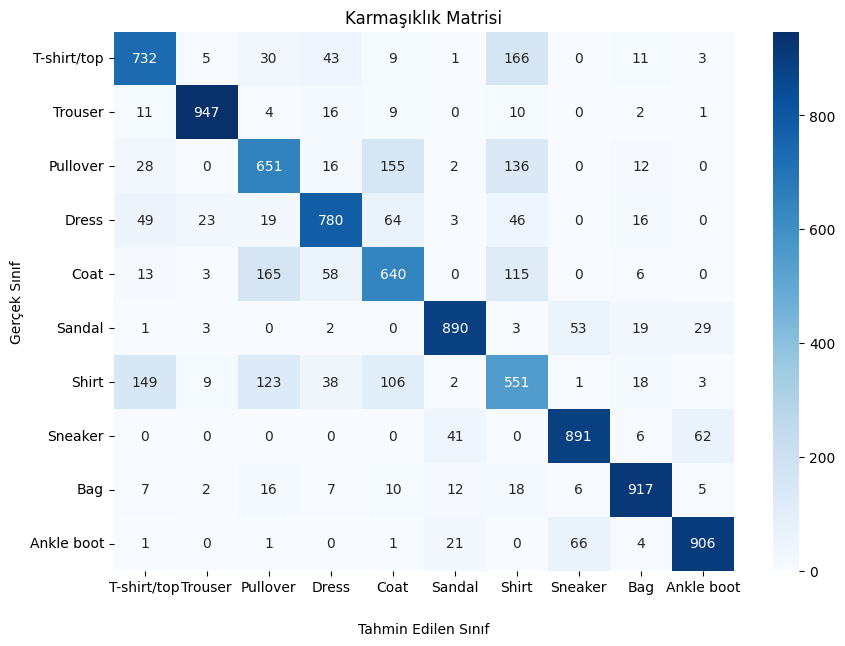

In [ ]:
# Karmaşıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketleri
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf', labelpad=20)
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

SVC MODELİ

In [ ]:
svc=SVC().fit(X_train,y_train)

In [ ]:
y_pred=svc.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.8828
F1 Skoru: 0.8823
Geri Çağırma (Recall): 0.8828
Kesinlik (Precision): 0.8823


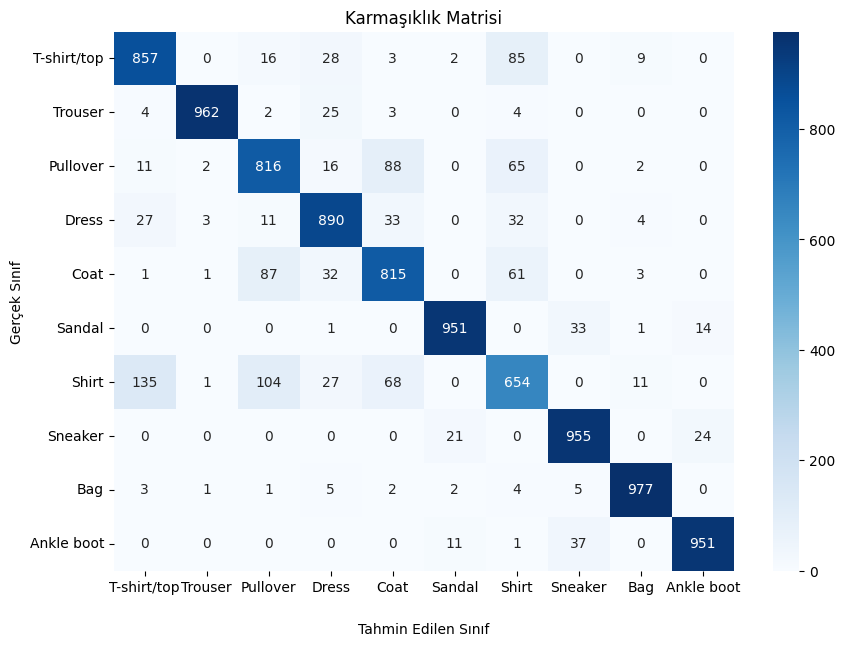

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketleri
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf', labelpad=20)
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


Logistic Regresyon

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred=logreg.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.8412
F1 Skoru: 0.8399
Geri Çağırma (Recall): 0.8412
Kesinlik (Precision): 0.8397


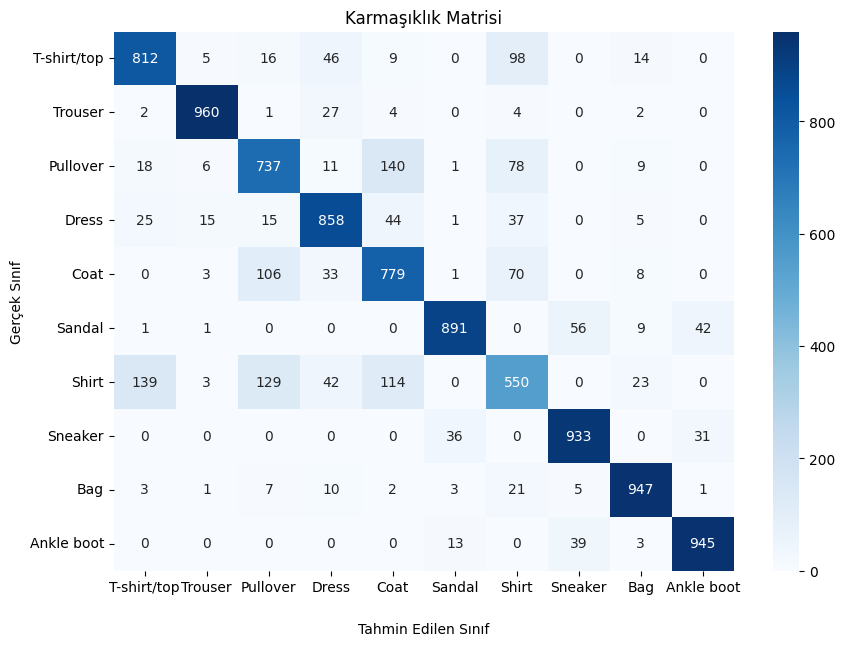

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Sınıf etiketleri
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf', labelpad=20)
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

**YSA ile Model Eğitimi**


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
## classlar için one hot encoding işlemi
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),


    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 300)               235500    
                                                                 
 dense_31 (Dense)            (None, 100)               30100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.4759 - accuracy: 0.8304 - precision_8: 0.8736 - recall_8: 0.7830 - f1_score: 0.8292 - val_loss: 0.4337 - val_accuracy: 0.8399 - val_precision_8: 0.8756 - val_recall_8: 0.8045 - val_f1_score: 0.8381
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3603 - accuracy: 0.8681 - precision_8: 0.8953 - recall_8: 0.8416 - f1_score: 0.8675 - val_loss: 0.3766 - val_accuracy: 0.8624 - val_precision_8: 0.8964 - val_recall_8: 0.8301 - val_f1_score: 0.8615
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3234 - accuracy: 0.8798 - precision_8: 0.9045 - recall_8: 0.8580 - f1_score: 0.8794 - val_loss: 0.3519 - val_accuracy: 0.8724 - val_precision_8: 0.8952 - val_recall_8: 0.8487 - val_f1_score: 0.8723
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3029 - accuracy: 0.8878 - precision_8: 0.9087 - recall_8: 0.8682 - f1_score: 0.8875 - val_

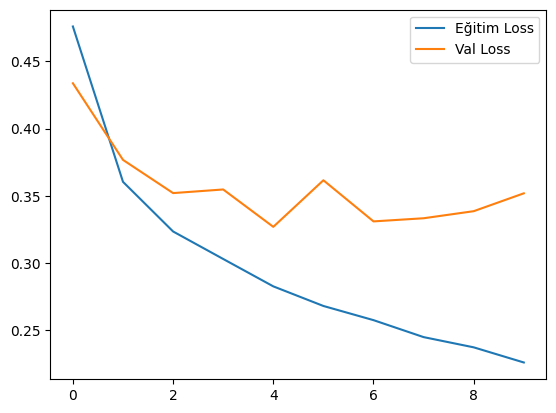

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

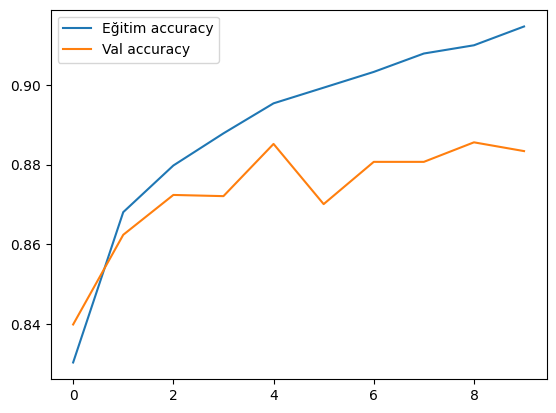

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()